# S11 T01: Practicant amb training i test sets

## Nivell 1

- Exercici 1: Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [83]:
# importos algunas librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# descripción de los datos: https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

plt.style.use('default')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (8, 6)}) # set font and plot size to be larger

# Carga del dataset:
delay_df = pd.read_csv(r'..\DB\DelayedFlights.csv')

pd.set_option('display.max_columns', None) #muestra todas las columnas

delay_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [84]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [85]:
delay_df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [86]:
delay_df.shape

(1936758, 30)

In [87]:
# Importamos la libreria de sklearn para separar el dataset en train y test:
from sklearn.model_selection import train_test_split

In [88]:
# Separamos el dataset original en dos nuevos: train, de un 60% (0.6) del original y test, de un 40% (0.4).
train, test = train_test_split(delay_df, train_size=0.6, random_state=1) # No hemos definido un "target", por lo que separamos en train y test únicamente (en vez de X_train, X_test, y_train e y_test)
print(f'Train shape: {train.shape};\nTest shape: {test.shape}')

Train shape: (1162054, 30);
Test shape: (774704, 30)


In [89]:
train.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.162054e+06,1162054.0,1.162054e+06,1.162054e+06,1.162054e+06,1.162054e+06,1.162054e+06,1.157794e+06,1.162054e+06,1.162054e+06,1.157026e+06,1.161933e+06,1.157026e+06,1.157026e+06,1.162054e+06,1.162054e+06,1.157794e+06,1.161773e+06,1.162054e+06,1.162054e+06,748583.000000,748583.000000,748583.000000,748583.000000,748583.000000
mean,3.342332e+06,2008.0,6.112281e+00,1.575188e+01,3.984115e+00,1.518596e+03,1.467595e+03,1.609886e+03,1.634249e+03,2.184210e+03,1.333051e+02,1.342922e+02,1.082678e+02,4.219532e+01,4.317138e+01,7.656286e+02,6.813870e+00,1.823807e+01,3.356126e-04,3.991209e-03,19.162355,3.716252,14.998967,0.090520,25.310508
std,2.066582e+06,0.0,3.483586e+00,8.772837e+00,1.995914e+00,4.505694e+02,4.247352e+02,5.485231e+02,4.647362e+02,1.944751e+03,7.199538e+01,7.126962e+01,6.857249e+01,5.671437e+01,5.331610e+01,5.739216e+02,5.272917e+00,1.435829e+01,1.831667e-02,6.304984e-02,43.404298,21.642513,33.817136,2.093131,41.982033
min,1.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.518003e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.242630e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.706000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,8.000000
75%,4.972978e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.031000e+03,2.014000e+03,3.423000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,21.000000,0.000000,15.000000,0.000000,33.000000
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,7.500000e+02,6.600000e+02,6.640000e+02,2.453000e+03,2.467000e+03,4.962000e+03,2.400000e+02,3.930000e+02,1.000000e+00,1.000000e+00,2436.000000,1352.000000,1357.000000,392.000000,1254.000000


In [90]:
test.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7.747040e+05,774704.0,774704.000000,774704.000000,774704.000000,774704.000000,774704.000000,771854.000000,774704.000000,774704.000000,771345.000000,774627.000000,771345.000000,771345.000000,774704.000000,774704.000000,771854.000000,774530.000000,774704.000000,774704.000000,498905.000000,498905.000000,498905.000000,498905.000000,498905.000000
mean,3.340630e+06,2008.0,6.109344,15.755850,3.985895,1518.441725,1467.288613,1610.523308,1634.188728,2184.343437,133.307045,134.318509,108.291213,42.206735,43.205870,765.772496,6.811633,18.223409,0.000314,0.004022,19.204973,3.684543,15.055648,0.089562,25.275397
std,2.065290e+06,0.0,3.480988,8.781427,1.996045,450.359299,424.814361,547.660486,464.482772,1944.630963,72.157045,71.449080,68.747706,56.890106,53.531876,575.316062,5.274615,14.308852,0.017708,0.063293,43.758304,21.266447,33.856925,1.912201,42.163935
min,0.000000e+00,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,-21.000000,0.000000,-68.000000,6.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.516732e+06,2008.0,3.000000,8.000000,2.000000,1203.000000,1135.000000,1316.000000,1325.000000,611.000000,80.000000,82.000000,58.000000,9.000000,12.000000,338.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.242362e+06,2008.0,6.000000,16.000000,4.000000,1545.000000,1510.000000,1715.000000,1705.000000,1543.000000,116.000000,116.000000,90.000000,24.000000,24.000000,606.000000,6.000000,14.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,4.970914e+06,2008.0,9.000000,23.000000,6.000000,1900.000000,1815.000000,2030.000000,2014.000000,3422.000000,165.000000,165.000000,137.000000,56.000000,53.000000,998.000000,8.000000,21.000000,0.000000,0.000000,21.000000,0.000000,15.000000,0.000000,33.000000
max,7.009717e+06,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9742.000000,1114.000000,660.000000,1091.000000,2461.000000,2457.000000,4962.000000,200.000000,422.000000,1.000000,1.000000,1951.000000,1070.000000,1024.000000,229.000000,1316.000000


In [91]:
# Comparamos la media del ArrDelay del original, train y test
print(f'La media de ArrDelay del dataset original es de: {round(delay_df.ArrDelay.mean(),3)} minutos')
print(f'La media de ArrDelay del dataset train es de: {round(train.ArrDelay.mean(),3)} minutos')
print(f'La media de ArrDelay del dataset test es de: {round(test.ArrDelay.mean(),3)} minutos')

# Comparamos la mediana del ArrDelay del original, train y test
print(f'\nLa mediana de ArrDelay del dataset original es de: {round(delay_df.ArrDelay.median(),3)} minutos')
print(f'La mediana de ArrDelay del dataset train es de: {round(train.ArrDelay.median(),3)} minutos')
print(f'La mediana de ArrDelay del dataset test es de: {round(test.ArrDelay.median(),3)} minutos')

La media de ArrDelay del dataset original es de: 42.2 minutos
La media de ArrDelay del dataset train es de: 42.195 minutos
La media de ArrDelay del dataset test es de: 42.207 minutos

La mediana de ArrDelay del dataset original es de: 24.0 minutos
La mediana de ArrDelay del dataset train es de: 24.0 minutos
La mediana de ArrDelay del dataset test es de: 24.0 minutos


In [92]:
# Comparamos ahora el porcentaje de vuelos de cada aerolinia
vuelos_original = delay_df.UniqueCarrier.value_counts(normalize=True)
vuelos_train = train.UniqueCarrier.value_counts(normalize=True)
vuelos_test = test.UniqueCarrier.value_counts(normalize=True)

print(f'Original (%): {vuelos_original[:4]*100}\n\nTrain (%): {vuelos_train[:4]*100}\n\nTest (%): {vuelos_test[:4]*100}')

Original (%): WN    19.496602
AA     9.906504
MQ     7.327710
UA     7.302203
Name: UniqueCarrier, dtype: float64

Train (%): WN    19.479215
AA     9.900917
MQ     7.313429
UA     7.312655
Name: UniqueCarrier, dtype: float64

Test (%): WN    19.522682
AA     9.914884
MQ     7.349129
UA     7.286525
Name: UniqueCarrier, dtype: float64


Si comparamos el dataset original con el train y el test, podemos ver que los resultados (media, mediana, porcentaje de vuelo de las top 4 aerolinias, etc) son muy similares. Por lo que podemos predecir buenos resultados cuando tengamos un modelo entrenado con *train* y le pasemos el *test* para probarlo.

## Nivell 2

- Exercici 2: Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [93]:
# Para estandarizar datos, nos centraremos en Departure Delay. Usaremos RobustScaler, para tratar con posibles outliers:
dept = train.DepDelay.to_frame()
describe_dept = dept.describe()
describe_dept

,DepDelay
count,1.162054e+06
mean,4.317138e+01
std,5.331610e+01
min,6.000000e+00
25%,1.200000e+01
50%,2.400000e+01
75%,5.300000e+01
max,2.467000e+03


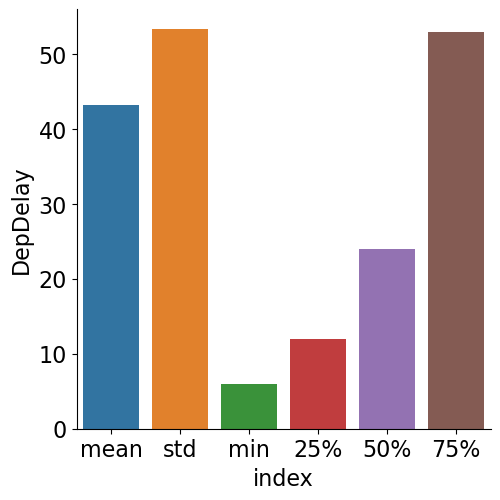

In [94]:
describe_dept.reset_index(inplace=True)
describe_dept = describe_dept[describe_dept['index'] != 'count'] 
describe_dept = describe_dept[describe_dept['index'] != 'max'] # eliminamos las columnas 'count' y 'max' para enfocar las gráficas en el resto de variables. 
for i in describe_dept.columns:
    if i in ['index']:
        continue
    splot = sns.catplot(x='index', y=i, data=describe_dept, kind='bar')
    #fig, ax = grid.axes[0,0]
    #ax.bar_label(ax.containers[0])

    plt.show()

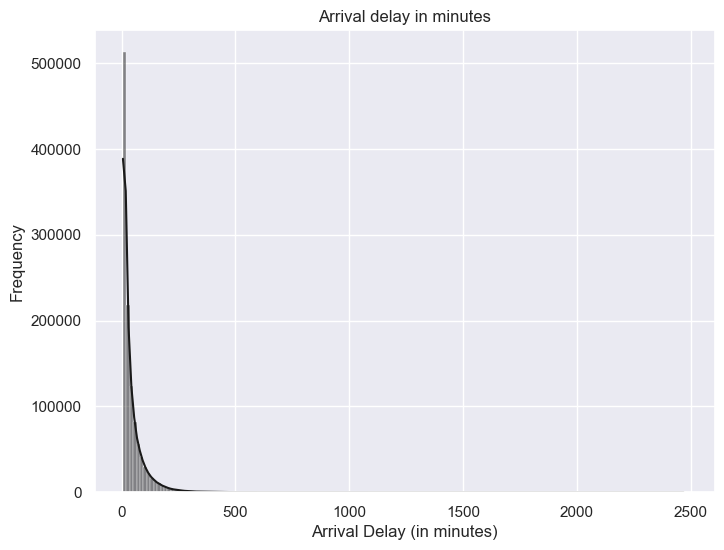

In [95]:
sns.set(style="darkgrid") #darkgrid, whitegrid, dark, white, and ticks
sns.histplot(train, x = 'DepDelay', binwidth=15, kde = True, color = 'k')
plt.title('Arrival delay in minutes')
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (in minutes)')
plt.show()

Como vemos, hay outliers que hacen que la gráfica tenga una "cola" muy larga hacia la derecha. Haremos la comparativa entre StandardScaler y RobustScaler

In [96]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [97]:
trans = StandardScaler()
dept_stand = trans.fit_transform(dept)
dept_stand = pd.DataFrame(dept_stand, columns=['Stand_DepDelay'])
describe_dept_stand = dept_stand.describe()
describe_dept_stand

,Stand_DepDelay
count,1.162054e+06
mean,7.479030e-17
std,1.000000e+00
min,-6.971890e-01
25%,-5.846526e-01
50%,-3.595798e-01
75%,1.843463e-01
max,4.546150e+01


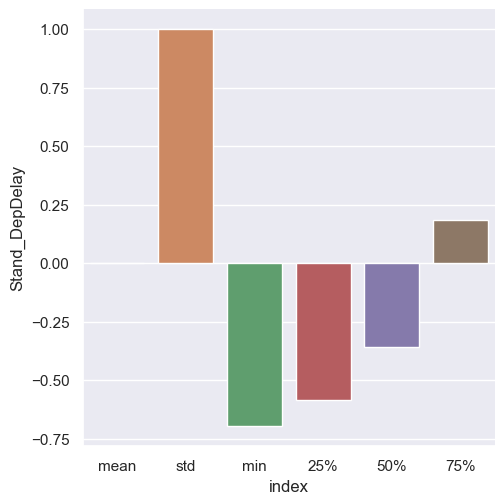

In [98]:
describe_dept_stand.reset_index(inplace=True)
describe_dept_stand = describe_dept_stand[describe_dept_stand['index'] != 'count'] 
describe_dept_stand = describe_dept_stand[describe_dept_stand['index'] != 'max'] # eliminamos las columnas 'count' y 'max' para enfocar las gráficas en el resto de variables. 
for i in describe_dept_stand.columns:
    if i in ['index']:
        continue
    splot = sns.catplot(x='index', y=i, data=describe_dept_stand, kind='bar')
    
    plt.show()

In [99]:
trans = RobustScaler()
dept_robust = trans.fit_transform(dept)
dept_robust = pd.DataFrame(dept_robust, columns=['Robust_DepDelay'])
describe_dept_robust = dept_robust.describe()
describe_dept_robust

,Robust_DepDelay
count,1.162054e+06
mean,4.675947e-01
std,1.300393e+00
min,-4.390244e-01
25%,-2.926829e-01
50%,0.000000e+00
75%,7.073171e-01
max,5.958537e+01


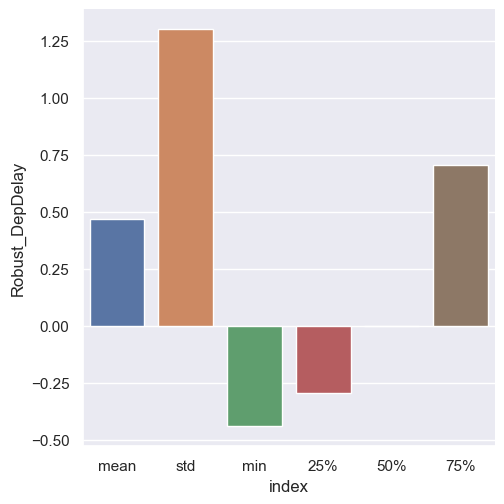

In [100]:
describe_dept_robust.reset_index(inplace=True)
describe_dept_robust = describe_dept_robust[describe_dept_robust['index'] != 'count'] 
describe_dept_robust = describe_dept_robust[describe_dept_robust['index'] != 'max'] # eliminamos las columnas 'count' y 'max' para enfocar las gráficas en el resto de variables. 
for i in describe_dept_robust.columns:
    if i in ['index']:
        continue
    splot = sns.catplot(x='index', y=i, data=describe_dept_robust, kind='bar')
    
    plt.show()

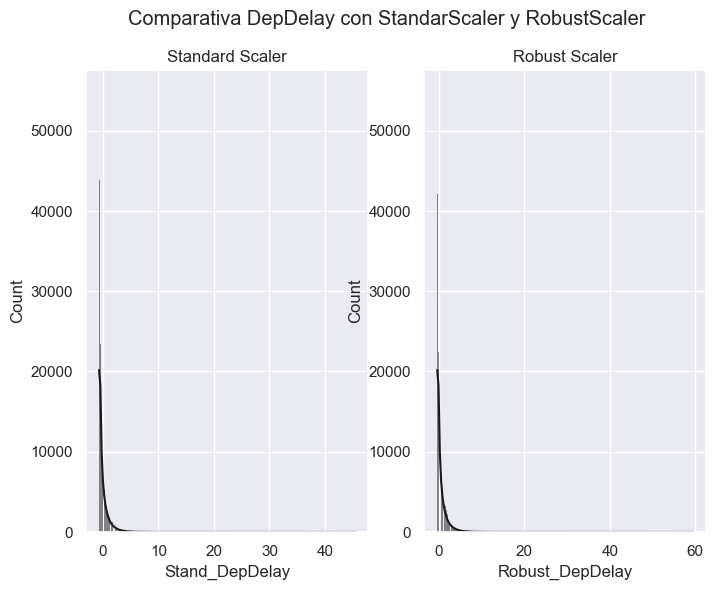

In [101]:
sns.set(style="darkgrid") #darkgrid, whitegrid, dark, white, and ticks
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Comparativa DepDelay con StandarScaler y RobustScaler')
sns.histplot(dept_stand, x='Stand_DepDelay', ax=axes[0], kde = True, color = 'k')
axes[0].set_title('Standard Scaler')
sns.histplot(dept_robust, x='Robust_DepDelay', ax=axes[1], kde = True, color = 'k')
axes[1].set_title('Robust Scaler')


plt.show()

In [102]:
# A continuación crearemos columnas dummies, sobre la columna UniqueCarrier
dummies = pd.get_dummies(delay_df['UniqueCarrier'], prefix='Carrier', prefix_sep=' - ', columns=['UniqueCarrier'])
dummies

,Carrier - 9E,Carrier - AA,Carrier - AQ,Carrier - AS,Carrier - B6,Carrier - CO,Carrier - DL,Carrier - EV,Carrier - F9,Carrier - FL,Carrier - HA,Carrier - MQ,Carrier - NW,Carrier - OH,Carrier - OO,Carrier - UA,Carrier - US,Carrier - WN,Carrier - XE,Carrier - YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936754,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
dummies.sum().sort_values(ascending=False) # vemos el total de vuelos de cada aerolínea

Carrier - WN    377602
Carrier - AA    191865
Carrier - MQ    141920
Carrier - UA    141426
Carrier - OO    132433
Carrier - DL    114238
Carrier - XE    103663
Carrier - CO    100195
Carrier - US     98425
Carrier - EV     81877
Carrier - NW     79108
Carrier - FL     71284
Carrier - YV     67063
Carrier - B6     55315
Carrier - OH     52657
Carrier - 9E     51885
Carrier - AS     39293
Carrier - F9     28269
Carrier - HA      7490
Carrier - AQ       750
dtype: int64

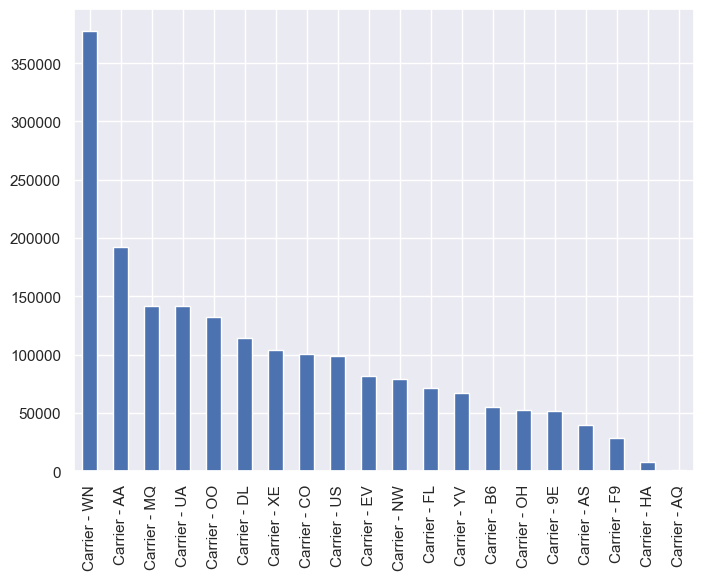

In [104]:
dummies.sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [105]:
# A continuación realizaremos una transformación polinómica sobre las columnas AirTime, ArrDelay y DepDelay, para ver si existe relación entre retraso a la salida, retraso a la llegada y tiempo en el aire.
from sklearn.preprocessing import PolynomialFeatures # Importamos la librería

In [106]:
poli = delay_df[['DepDelay', 'AirTime', 'ArrDelay']].copy()
poli.head()

,DepDelay,AirTime,ArrDelay
0,8.0,116.0,-14.0
1,19.0,113.0,2.0
2,8.0,76.0,14.0
3,34.0,77.0,34.0
4,25.0,87.0,11.0


In [107]:
# Tenemos que quitar los NaN
poli.count()

DepDelay    1936758
AirTime     1928371
ArrDelay    1928371
dtype: int64

In [108]:
type(poli)

pandas.core.frame.DataFrame

In [109]:
poli.shape

(1936758, 3)

In [110]:
# Como el número de NaN es pequeño, los eliminamos
poli.dropna(inplace=True)
poli

,DepDelay,AirTime,ArrDelay
0,8.0,116.0,-14.0
1,19.0,113.0,2.0
2,8.0,76.0,14.0
3,34.0,77.0,34.0
4,25.0,87.0,11.0
...,...,...,...
1936753,30.0,120.0,25.0
1936754,57.0,78.0,75.0
1936755,80.0,122.0,99.0
1936756,11.0,89.0,9.0


In [111]:
poli.reset_index(drop=True, inplace=True)
poli

,DepDelay,AirTime,ArrDelay
0,8.0,116.0,-14.0
1,19.0,113.0,2.0
2,8.0,76.0,14.0
3,34.0,77.0,34.0
4,25.0,87.0,11.0
...,...,...,...
1928366,30.0,120.0,25.0
1928367,57.0,78.0,75.0
1928368,80.0,122.0,99.0
1928369,11.0,89.0,9.0


In [112]:
poli.shape

(1928371, 3)

In [113]:
poli.count()

DepDelay    1928371
AirTime     1928371
ArrDelay    1928371
dtype: int64

In [114]:
transform = PolynomialFeatures(degree=3, interaction_only=True ) # "Poli" se transforma de: DepDelay=X1, AirTime=X2 y ArrDelay=X3; a 1, X1, X2, X3, X1*X2, X1*X3, X2*X3, X1*X2*X3
a = pd.DataFrame(transform.fit_transform(poli))
a.tail()

,0,1,2,3,4,5,6,7
1928366,1.0,30.0,120.0,25.0,3600.0,750.0,3000.0,90000.0
1928367,1.0,57.0,78.0,75.0,4446.0,4275.0,5850.0,333450.0
1928368,1.0,80.0,122.0,99.0,9760.0,7920.0,12078.0,966240.0
1928369,1.0,11.0,89.0,9.0,979.0,99.0,801.0,8811.0
1928370,1.0,7.0,104.0,-5.0,728.0,-35.0,-520.0,-3640.0


In [115]:
a.shape

(1928371, 8)

In [116]:
a.count()

0    1928371
1    1928371
2    1928371
3    1928371
4    1928371
5    1928371
6    1928371
7    1928371
dtype: int64

In [117]:
new_poli = pd.concat([poli, a], axis=1)
new_poli

,DepDelay,AirTime,ArrDelay,0,1,2,3,4,5,6,7
0,8.0,116.0,-14.0,1.0,8.0,116.0,-14.0,928.0,-112.0,-1624.0,-12992.0
1,19.0,113.0,2.0,1.0,19.0,113.0,2.0,2147.0,38.0,226.0,4294.0
2,8.0,76.0,14.0,1.0,8.0,76.0,14.0,608.0,112.0,1064.0,8512.0
3,34.0,77.0,34.0,1.0,34.0,77.0,34.0,2618.0,1156.0,2618.0,89012.0
4,25.0,87.0,11.0,1.0,25.0,87.0,11.0,2175.0,275.0,957.0,23925.0
...,...,...,...,...,...,...,...,...,...,...,...
1928366,30.0,120.0,25.0,1.0,30.0,120.0,25.0,3600.0,750.0,3000.0,90000.0
1928367,57.0,78.0,75.0,1.0,57.0,78.0,75.0,4446.0,4275.0,5850.0,333450.0
1928368,80.0,122.0,99.0,1.0,80.0,122.0,99.0,9760.0,7920.0,12078.0,966240.0
1928369,11.0,89.0,9.0,1.0,11.0,89.0,9.0,979.0,99.0,801.0,8811.0


In [118]:
new_poli.shape

(1928371, 11)

**SOLUCIONADO**: Era problema de índices en la matriz poli 
- *(No entiendo porqué al juntar el dataframe poli, con el auxiliar a, me aparecen NaN en la cola del nuevo df. He comprobado las dimensiones de ambos después de quitarle los NaN en el df "poli" y no tiene sentido que aparezcan NaN en la parte de la transformación polinómica: uno de los requisitos de PolinomialFeatures es que no le pases NaN)*

In [119]:
# Cambiamos el nombre de las columnas para identificar más fácilmente qué es qué
columns = {'DepDelay':'X1:DepDelay', 'AirTime':'X2:AirTime','ArrDelay':'X3:ArrDelay',0:1, 1:'X1', 2:'X2', 3:'X3', 4:'X1*X2', 5:'X1*X3', 6:'X2*X3', 7:'X1*X2*X3'}
new_poli.rename(columns=columns, inplace=True)
new_poli.head(2)

,X1:DepDelay,X2:AirTime,X3:ArrDelay,1,X1,X2,X3,X1*X2,X1*X3,X2*X3,X1*X2*X3
0,8.0,116.0,-14.0,1.0,8.0,116.0,-14.0,928.0,-112.0,-1624.0,-12992.0
1,19.0,113.0,2.0,1.0,19.0,113.0,2.0,2147.0,38.0,226.0,4294.0


In [120]:
new_poli.describe()

,X1:DepDelay,X2:AirTime,X3:ArrDelay,1,X1,X2,X3,X1*X2,X1*X3,X2*X3,X1*X2*X3
count,1.928371e+06,1.928371e+06,1.928371e+06,1928371.0,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,4.309169e+01,1.082771e+02,4.219988e+01,1.0,4.309169e+01,1.082771e+02,4.219988e+01,4.655778e+03,4.700775e+03,4.568547e+03,5.242381e+05
std,5.326600e+01,6.864261e+01,5.678472e+01,0.0,5.326600e+01,6.864261e+01,5.678472e+01,7.755587e+03,2.356884e+04,8.314920e+03,3.982648e+06
min,6.000000e+00,0.000000e+00,-1.090000e+02,1.0,6.000000e+00,0.000000e+00,-1.090000e+02,0.000000e+00,-2.071000e+03,-2.235600e+04,-4.912000e+05
25%,1.200000e+01,5.800000e+01,9.000000e+00,1.0,1.200000e+01,5.800000e+01,9.000000e+00,1.045000e+03,1.040000e+02,6.370000e+02,8.190000e+03
50%,2.400000e+01,9.000000e+01,2.400000e+01,1.0,2.400000e+01,9.000000e+01,2.400000e+01,2.247000e+03,5.440000e+02,2.075000e+03,4.857600e+04
75%,5.300000e+01,1.370000e+02,5.600000e+01,1.0,5.300000e+01,1.370000e+02,5.600000e+01,5.184000e+03,2.805000e+03,5.432000e+03,2.592960e+05
max,2.467000e+03,1.091000e+03,2.461000e+03,1.0,2.467000e+03,1.091000e+03,2.461000e+03,1.073709e+06,6.051551e+06,1.145550e+06,2.642398e+09


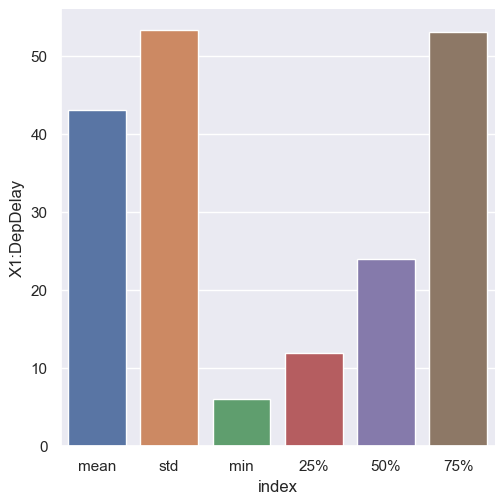

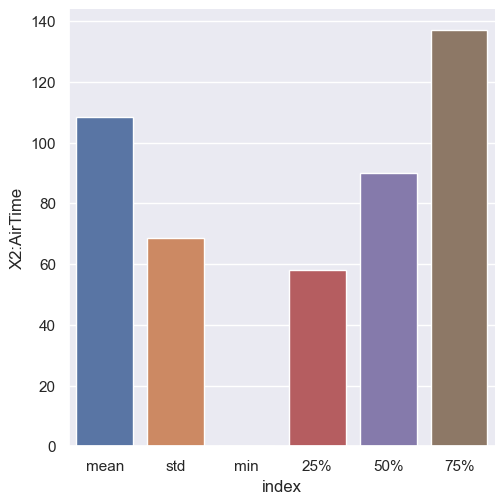

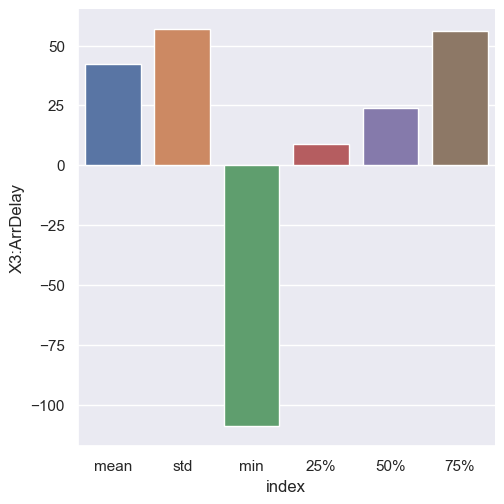

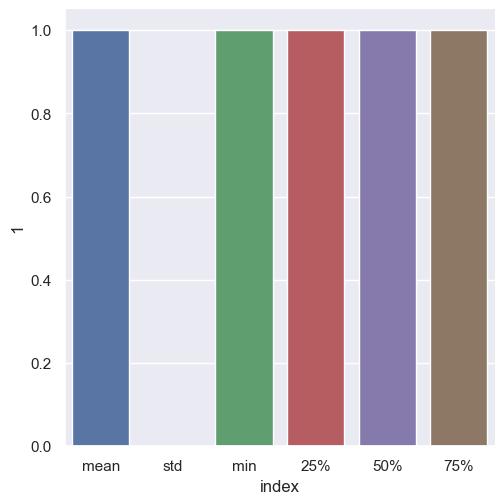

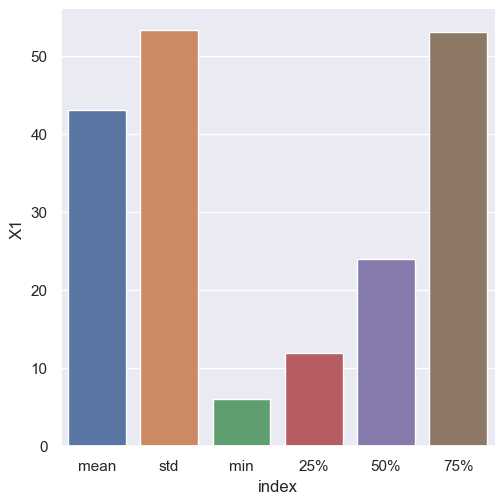

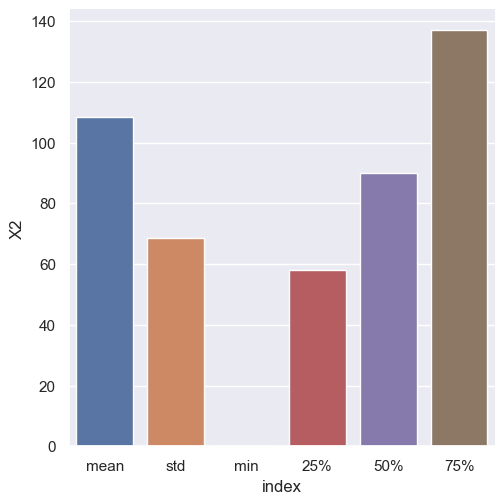

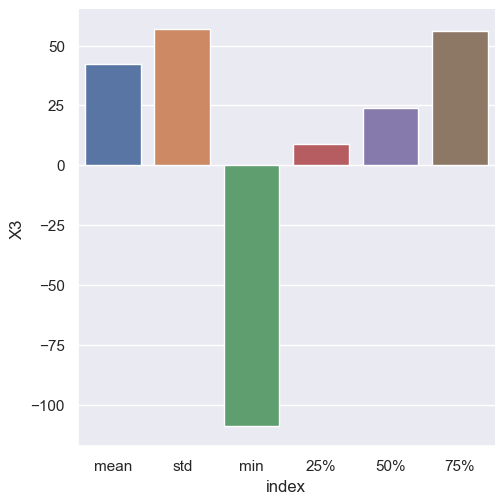

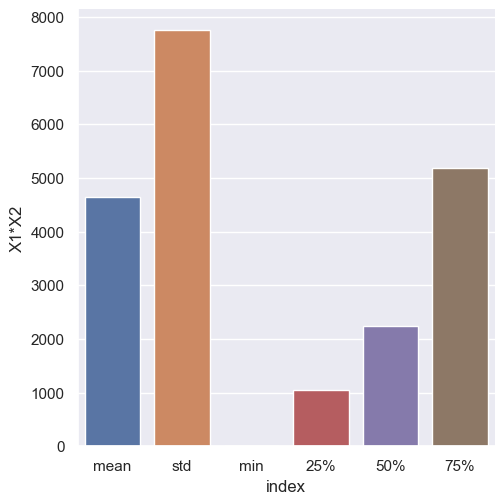

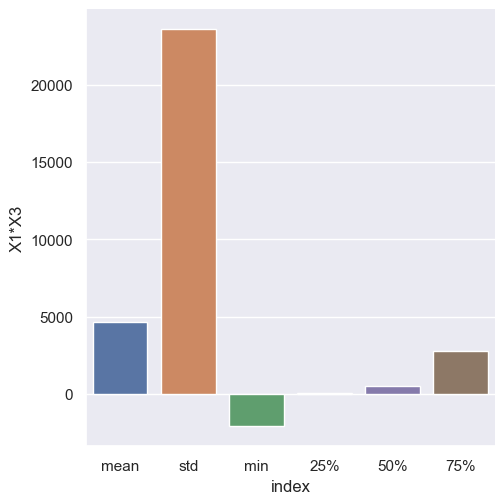

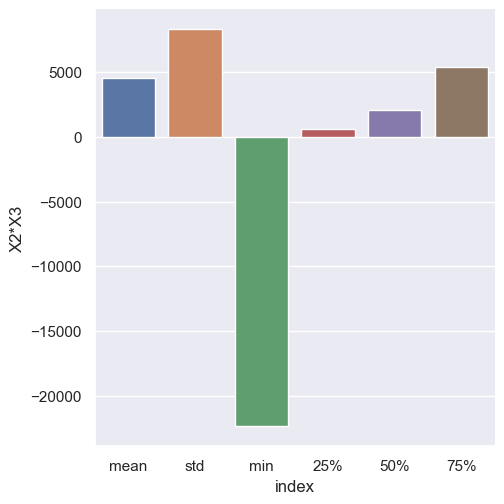

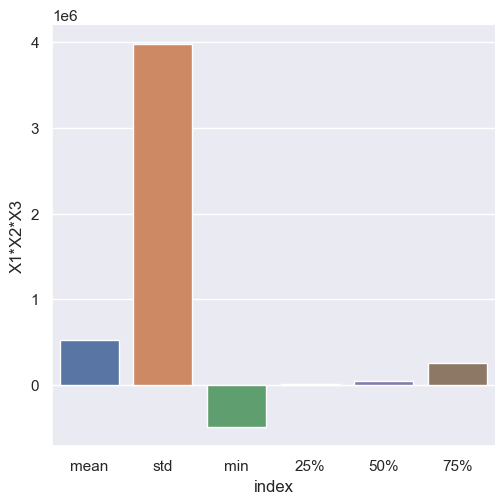

In [121]:
describe_poli = new_poli.describe()
describe_poli.reset_index(inplace=True)
describe_poli = describe_poli[describe_poli['index'] != 'count'] 
describe_poli = describe_poli[describe_poli['index'] != 'max'] # eliminamos las columnas 'count' y 'max' para enfocar las gráficas en el resto de variables. 
for i in describe_poli.columns:
    if i in ['index']:
        continue
    splot = sns.catplot(x='index', y=i, data=describe_poli, kind='bar')
    #fig, ax = grid.axes[0,0]
    #ax.bar_label(ax.containers[0])

    plt.show()

## Nivell 3

- Exercici 3: Resumeix les noves columnes generades de manera estadística i gràfica

Se ha ido describiendo las nuevas variables a medida que se creaban (dept_stand y dept_robust; dummies; y poli)